In [1]:
import math
from typing import List

from matplotlib import pyplot as plt

In [2]:
"""
1.) Write computer codes to compute the coefficients c_0, c_1,...,c_n and to 
evaluate the corresponding interpolation polynomial at an arbitrary point x. 
Test your code and turn in a run of your test. 
"""
def newton_coefficients(x: List[float], f_x: List[float]):
    """Finds the coefficients for Newton's interpolation form.
    :param x: List of nodes.
    :param f_x: List of values at x nodes.
    :return: List of coefficients used for Newton's interpolation polynomial.
    """
    n = len(x)
    c = f_x
    for k in range(1, n):
        for j in range(n - 1, k - 1, -1):
            c[j] = (c[j] - c[j - 1]) / (x[j] - x[j - k])
    return c


def interpolation_polynomial(x: float, x_j: List[float], c: List[float]):
    """Uses Horner-like scheme to create Newton's polynomial.
    :param x: Point to evaluate the polynomial at
    :param x_j: List of nodes
    :param c: List of polynomial coefficients
    :return:
    """
    n = len(c) - 1
    p = c[n]

    for j in range(n, 0, -1):
        p = (x - x_j[j - 1]) * p + c[j - 1]
    return p

In [3]:
#Test your codes and turn in a run of your test.
print(" -------------------------------------------------")
print("|Test your codes and turn in a run of your test.|")
print(" -------------------------------------------------")
x = [1, 3, 5, 8]
y = [1, 4, 16, 32]

coeffs = newton_coefficients(x, y)
print(coeffs)
print(interpolation_polynomial(7, x, coeffs))

# consider f(x) = xe^{-x^{2}} for x in [-1, 1]
# with nodes x_j = -1 + j(2/10) for j = 0, 1, ..., 100
print("\n\n --------------------------------------------------------------------------------------------------")
print("|Consider f(x) = xe^{-x^{2}} for x in [-1, 1] with nodes x_j = -1 + j(2/10) for j = 0, 1, ..., 100|")
print(" --------------------------------------------------------------------------------------------------")
f = lambda x: x * math.e ** ((-x) ** 2)
x_j = [-1 + j * (2 / 10) for j in range(11)]
f_x = [f(x) for x in x_j]
p_10_coeffs = newton_coefficients(x_j, f_x)
print(p_10_coeffs)

# evaluate p_10_coeffs(x) at points x^{bar} = -1 + j(2/10) for j = 0, 1, ..., 100
x_j = [-1 + j * (2 / 100) for j in range(101)]
f_x = [f(x) for x in x_j]
p_100_coeffs = newton_coefficients(x_j, f_x)

print("\n\n -------------------------------------------------------------------------------")
print("|Evaluate p_10_coeffs(x) at points x^{bar} = -1 + j(2/10) for j = 0, 1, ..., 100|")
print(" -------------------------------------------------------------------------------")
print(p_100_coeffs)

# plot error f(x) - p_100_coeffs(x)
print("\n\n ----------------------------------")
print("|Plot error f(x) - p_100_coeffs(x)|")
print(" ----------------------------------")
error = []
for x in x_j:
    error.append(f(x) - interpolation_polynomial(x, x_j, p_100_coeffs))
print(error)

 -------------------------------------------------
|Test your codes and turn in a run of your test.|
 -------------------------------------------------
[1, 1.5, 1.125, -0.17976190476190476]
28.37142857142857


 --------------------------------------------------------------------------------------------------
|Consider f(x) = xe^{-x^{2}} for x in [-1, 1] with nodes x_j = -1 + j(2/10) for j = 0, 1, ..., 100|
 --------------------------------------------------------------------------------------------------
[-2.718281828459045, 6.005485625075421, -6.798875878841591, 5.777423248730219, -3.6477517800001955, 2.059950229854935, -0.8967347795691796, 0.4143727957645485, -0.1176379681123087, 0.06535442672907697, -3.422262473407045e-14]


 -------------------------------------------------------------------------------
|Evaluate p_10_coeffs(x) at points x^{bar} = -1 + j(2/10) for j = 0, 1, ..., 100|
 -------------------------------------------------------------------------------
[-2.71828182845904

In [4]:
"""
2.) Obtain the Hermite interpolation polynomial corresponding to the data
f(0) = 0, f'(0) = 0, f(1) = 2, f'(1) = 3.
"""

print("""
    In order to do this we first find our coefficients given by:

    x_j         0th         1st                                  2nd                                       3rd
     0        f(0)=0   f[0,0]=f'(0)/1=0             f[0,0,1]=(f[0,1]-f[0,0])/(1-0)=2     f[0,0,1,1]=(f[0,1,1]-f[0,0,1])/(1-0)=-1          
     0        f(0)=0   f[0,1]=(f(1)-f(0))/(1-0)=2   f[0,1,1]=(f[1,1]-f[0,1])/(1-0)=3
     1        f(1)=2   f[1,1]=f'(1)/1=3
     1        f(1)=2

    Then using the Newton interpolation polynomial:
    p_k(x)=f(x_0)+f[x_0,x_1](x-x_0)+...+f[x_0,x_1,...,x_k](x-x_0)...(x-x_k-1)
    we can obtain
    p_3(x)=f(0)+f[0,0](x-x_0)+f[0,0,1](x-x_0)(x-x_1)+f[0,0,1,1](x-x_0)(x-x_1)(x-x_2)
          =0+0(x-0)+2(x-0)(x-0)+(-1)(x-0)(x-0)(x-1)
          =2x^(2)+(-1)x^(3)-x^(2)
          =-x^(3)+x^(2)
""")


    In order to do this we first find our coefficients given by:

    x_j         0th         1st                                  2nd                                       3rd
     0        f(0)=0   f[0,0]=f'(0)/1=0             f[0,0,1]=(f[0,1]-f[0,0])/(1-0)=2     f[0,0,1,1]=(f[0,1,1]-f[0,0,1])/(1-0)=-1          
     0        f(0)=0   f[0,1]=(f(1)-f(0))/(1-0)=2   f[0,1,1]=(f[1,1]-f[0,1])/(1-0)=3
     1        f(1)=2   f[1,1]=f'(1)/1=3
     1        f(1)=2

    Then using the Newton interpolation polynomial:
    p_k(x)=f(x_0)+f[x_0,x_1](x-x_0)+...+f[x_0,x_1,...,x_k](x-x_0)...(x-x_k-1)
    we can obtain
    p_3(x)=f(0)+f[0,0](x-x_0)+f[0,0,1](x-x_0)(x-x_1)+f[0,0,1,1](x-x_0)(x-x_1)(x-x_2)
          =0+0(x-0)+2(x-0)(x-0)+(-1)(x-0)(x-0)(x-1)
          =2x^(2)+(-1)x^(3)-x^(2)
          =-x^(3)+x^(2)



In [5]:
"""
3.) In class, we learned to use piecewise cubic splines that interpolate a 
function. Find a piecewise linear function that interpolates 
(0, 2), (1, 2),(2, 1),(3, 9).
"""
print("""
A piecewise linear function, say f(x), that interpolates the points is:
      /  x+2 for 0<x<=1
f(x)= | -x+3 for 1<x<=2
      \ 3x-5 for 2<x<=3
""")


A piecewise linear function, say f(x), that interpolates the points is:
      /  x+2 for 0<x<=1
f(x)= | -x+3 for 1<x<=2
      \ 3x-5 for 2<x<=3



In [6]:
"""
4.) Write a code to compute a natural spline S(x) which interpolates a collection
of given points (x0, y0),(x1, y1), ··· ,(xn, yn) where x0 < x1 < ··· < xn (do not assume
they are equidistributed). Your code should have a triadiagonal solver for the resulting
linear system of equations.
"""

def tridiagonal_matrix_solver(a, b, c, d):
    n = len(a)
    # Initialize variables
    m, l, u, y, x = [], [], [], [], [0 for i in range(n + 1 )]

    m.append(a[0])
    for j in range(0, n):
        l.append(c[j - 1] / m[j - 1])
        u.append(b[j - 1])
        m.append(a[j] - l[j - 1] * b[j - 1])

    # Forward substitution
    y.append(d[0])
    for j in range(0, n):
        y.append(d[j] - l[j - 1] * y[j - 1])

    # Backward substitution
    for j in range(n, -1, -1):
        if j == n:
            x[j] = y[j] / m[j]
            continue
        x[j] = (y[j] - b[j] * x[j + 1]) / m[j]
    return x


def natural_cubic_spline_coeffs(x: List[int], y: List[int]):
    n = len(x)
    h = [x[i + 1] - x[i] for i in range(n - 1)]
    matrix_a_coeffs = [2 * (h[i] + h[i + 1]) for i in range(n - 2)]
    matrix_b_coeffs = matrix_c_coeffs = [h[i] for i in range(n - 2)]
    matrix_d_coeffs = []

    for i in range(n - 2):
        matrix_d_coeffs.append(
            -6 / h[i] * (y[1] - y[0]) + 6 / h[i + 1] * (y[i + 2] - y[i - 1])
        )

    z = tridiagonal_matrix_solver(
        matrix_a_coeffs, matrix_b_coeffs, matrix_c_coeffs, matrix_d_coeffs
    )

    polynomial_coeffs = []
    for j in range(n - 2):
        a_j = (1 / h[j] * (z[j + 1] - z[j]))
        b_j = z[j] / 2
        c_j = 1 / h[j] * (y[j + 1] - y[j]) - (h[j] / 6 * (z[j + 1] + 2 * z[j]))
        d_j = y[j]
        polynomial_coeffs.append((a_j, b_j, c_j, d_j))
    return polynomial_coeffs

In [7]:
x = [0, 1, 3, 6, 8, 12]
y = [5, 8, 12, 44, 60, 87]
coeffs = natural_cubic_spline_coeffs(x, y)

n = len(x)
for i in range(n - 2):
    print(f"S_0({i}<x<={i + 1}) = {coeffs[i][0]} + {coeffs[i][1]} (x-{x[i]})+ {coeffs[i][2]} (x-{x[i]})^2+ {coeffs[i][3]} (x-{x[i]})^3")

S_0(0<x<=1) = -0.5711488785928083 + -17.31634650867194 (x-0)+ 20.41153798843741 (x-0)^2+ 5 (x-0)^3
S_0(1<x<=2) = 22.64382508507934 + -17.601920947968345 (x-1)+ 22.107958505883797 (x-1)^2+ 8 (x-1)^3
S_0(2<x<=3) = 2.4746402066505393 + 5.0419041371109925 (x-3)+ -8.171006054642119 (x-3)^2+ 12 (x-3)^3
S_0(3<x<=4) = -6.581450653983353 + 8.753864447086801 (x-6)+ -5.1200951248513675 (x-6)^2+ 44 (x-6)^3


In [8]:
"""
5.) Use the values in Table 1 to construct a smooth parametric 
representation of a curve passing through the points (xj , yj ), j = 0, 
1, ··· , 8 by finding the two natural cubic splines interpolating and (
tj , yj ),j = 0, 1, ··· , 8, respectively. Tabulate the coefficients of 
the splines and plot the resulting parametric curve.

j       t_j     x_j      y_j
0        0      1.5      0.75
1      0.618    0.9      0.9
2      0.935    0.6      1.0
3      1.255    0.35     0.8
4      1.636    0.2      0.45
5      1.905    0.1      0.2
6      2.317    0.5      0.1
7      2.827    1.0      0.2
8      3.330    1.5      0.25
"""
# Cubic spline of (x_j, y_j) for j = 0, ..., 8
print("Cubic spline of (x_j, y_j) for j = 0, ..., 8")
x = [1.5, 0.9, 0.6, 0.35, 0.2, 0.1, 0.5, 1.0, 1.5]
y = [0.75, 0.9, 1.0, 0.8, 0.45, 0.2, 0.1, 0.2, 0.25]
n = len(x)
coeffs_xj_yj = natural_cubic_spline_coeffs(x, y)
for i in range(n - 2):
    print(f"S_0({i}<x<={i + 1}) = {coeffs_xj_yj[i][0]} + {coeffs_xj_yj[i][1]} (x-{x[i]})+ {coeffs_xj_yj[i][2]} (x-{x[i]})^2+ {coeffs_xj_yj[i][3]} (x-{x[i]})^3")

    
# Cubic spline of (t_j, y_j) for j = 0, ..., 8
print("\n\nCubic spline of (t_j, y_j) for j = 0, ..., 8")
y = [0.75, 0.9, 1.0, 0.8, 0.45, 0.2, 0.1, 0.2, 0.25]
t = [0, 0.618, 0.935, 1.255, 1.636, 1.905, 2.317, 2.827, 3.330]
n = len(t)
coeffs_tj_yj = natural_cubic_spline_coeffs(t, y)
for i in range(n - 2):
    print(f"S_0({i}<t<={i + 1}) = {coeffs_tj_yj[i][0]} + {coeffs_tj_yj[i][1]} (t-{t[i]})+ {coeffs_tj_yj[i][2]} (t-{t[i]})^2+ {coeffs_tj_yj[i][3]} (t-{t[i]})^3")


Cubic spline of (x_j, y_j) for j = 0, ..., 8
S_0(0<x<=1) = 7.147318416959333 + 3.3485488812719493 (x-1.5)+ 1.3302902237456093 (x-1.5)^2+ 0.75 (x-1.5)^3
S_0(1<x<=2) = -2.2161777236624447 + 1.2043533561841495 (x-0.9)+ 0.061215339376848366 (x-0.9)^2+ 0.9 (x-0.9)^3
S_0(2<x<=3) = 43.38505671506665 + 1.5367800147335162 (x-0.6)+ 0.7322673295681013 (x-0.6)^2+ 1.0 (x-0.6)^3
S_0(3<x<=4) = 739.3007690585034 + -3.8863520746498157 (x-0.35)+ -1.0219973618335247 (x-0.35)^2+ 0.8 (x-0.35)^3
S_0(4<x<=5) = -1149.0606208661065 + -59.33390975403756 (x-0.2)+ -1.5182899406269117 (x-0.2)^2+ 0.45 (x-0.2)^3
S_0(5<x<=6) = -13.837045167041207 + -1.8808787107322298 (x-0.1)+ 0.8713393554139908 (x-0.1)^2+ 0.2 (x-0.1)^3
S_0(6<x<=7) = 18.737766180000055 + -4.648287744140471 (x-0.5)+ 1.743403614570233 (x-0.5)^2+ 0.1 (x-0.5)^3


Cubic spline of (t_j, y_j) for j = 0, ..., 8
S_0(0<t<=1) = 0.8656869965550764 + 2.493699010476398 (t-0)+ -1.3534919819511888 (t-0)^2+ 0.75 (t-0)^3
S_0(1<t<=2) = -27.497651009657726 + 2.761196292

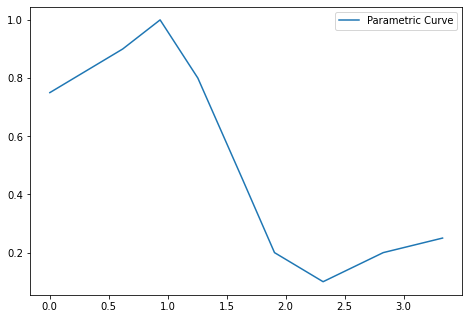

In [9]:
 y = [0.75, 0.9, 1.0, 0.8, 0.45, 0.2, 0.1, 0.2, 0.25]
t = [0, 0.618, 0.935, 1.255, 1.636, 1.905, 2.317, 2.827, 3.330]
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(t, y, label="Parametric Curve")
ax.legend()